#単回帰（特徴量：RM）の予測値の可視化

In [ ]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install pandas==1.5.3
# !pip install numpy==1.22.4
# !pip install matplotlib==3.7.1
# !pip install scikit-learn==1.2.2

In [ ]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
# バージョンの確認
import matplotlib
import sklearn
print(pd.__version__) 
print(np.__version__)
print(matplotlib.__version__)
print(sklearn.__version__) 

1.5.3
1.22.4
3.7.1
1.2.2


In [ ]:
# データセットの読み込み
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# 特徴量と目的変数の設定
X_train = df.loc[:99, ['RM']] # 特徴量にRM（平均部屋数）を設定
y_train = df.loc[:99, 'MEDV'] # 正解値にMEDV（住宅価格）を設定
print('X_train:', X_train[:3])
print('y_train:', y_train[:3])

X_train:       RM
0  6.575
1  6.421
2  7.185
y_train: 0    24.0
1    21.6
2    34.7
Name: MEDV, dtype: float64


In [ ]:
# モデルの学習
from sklearn.linear_model import LinearRegression

model = LinearRegression() # 線形回帰モデル
model.fit(X_train, y_train)
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
# 予測値
model.predict(X_train)

array([25.7910094 , 24.21659604, 32.02732208, 30.11553442, 31.63883047,
       24.30860721, 20.0351995 , 21.67095365, 16.14005995, 19.9534118 ,
       23.76676365, 20.00452911, 18.77771351, 19.39112131, 20.89397043,
       18.21542302, 19.24799282, 19.81028331, 14.35095385, 17.12151244,
       15.51642868, 19.55469672, 21.36424975, 18.00073029, 19.13553473,
       15.81290912, 18.00073029, 20.39302072, 24.97313233, 26.80313228,
       16.97838395, 20.64860731, 19.40134477, 16.85570239, 20.89397043,
       19.2275459 , 18.28698726, 18.37899843, 19.56492019, 25.99547867,
       30.38134447, 27.78458476, 21.64028326, 22.06966872, 20.61793692,
       16.66145658, 17.72469678, 20.21922185, 13.76821644, 15.84357951,
       19.5342498 , 21.08821624, 25.13670774, 19.89207102, 18.76749004,
       32.68162373, 23.82810443, 28.25486408, 21.39492014, 19.16620512,
       17.26464092, 19.56492019, 24.57441726, 27.70279706, 31.19922154,
       22.87732233, 17.73492024, 18.66525541, 15.7617918 , 18.73

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


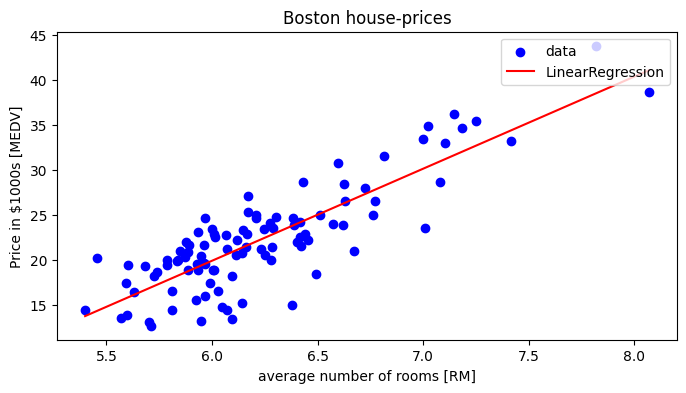

In [ ]:
# データと予測値の可視化
plt.figure(figsize=(8, 4)) #プロットのサイズ指定
X = X_train.values.flatten() # numpy配列に変換し、1次元配列に変換
y = y_train.values # numpy配列に変換

# Xの最小値から最大値まで0.01刻みのX_pltを作成し、2次元配列に変換
X_plt = np.arange(X.min(), X.max(), 0.01)[:, np.newaxis]
y_pred = model.predict(X_plt) # 住宅価格を予測

# 学習データ(平均部屋数と住宅価格)の散布図と予測値のプロット
plt.scatter(X, y, color='blue', label='data')
plt.plot(X_plt, y_pred, color='red', label='LinearRegression')
plt.ylabel('Price in $1000s [MEDV]')
plt.xlabel('average number of rooms [RM]')
plt.title('Boston house-prices')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# パラメータ
print('傾き w1:', model.coef_[0])
print('切片 w0:', model.intercept_) 

傾き w1: 10.223463401699545
切片 w0: -41.42826246618968
